In [192]:
#Generate cmap for force field (bessel beam)

#import modules
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import decimal

#define global variables in SI units
a = 10**-6
Lambda = 1064*10**-9
k = 2*np.pi/Lambda

def force(m, pos):
    #m is topological charge
    #pos is of form [x,y,z]
    x,y,z = pos[0], pos[1], pos[2]
    r = (x**2 + y**2)**0.5
    R = (r**2 + z**2)**0.5
    if R == 0:
        arg = 0 #bessel functions asymptote to zero at both 0 and infinity
    else:
        arg = a*k*r/R
    b = sp.jv(m,arg)
    intensity = (a/R)**4 * b**2
    F = -z*a**4/R**6 * b * (4*b + arg*(sp.jv(m-1,arg)-sp.jv(m+1,arg)))
    return F #can also return intensity

def force_z(m, xy):
    x,y = xy[0], xy[1]
    zmin, zmax, dz = 0, 1*10**-5, 10**-7
    zlist = list((range(zmin, int((zmax-zmin)/dz))))
    zlist = [dz*z for z in zlist]
    force_list = [force(m,[x,y,z]) for z in zlist]
    plt.plot(zlist, force_list)
    plt.xlabel('z')
    plt.ylabel('Force')
    return 

def cmap(m,z):
    dx, dy = 0.1*10**-6, 0.1*10**-6
    xmax, ymax = 20*10**-6, 20*10**-6
    i, j = 0, 0
    force_array = np.zeros((int(2*xmax/dx)+1,int(2*ymax/dx)+1))
    x,y = -1*xmax, -1*ymax
    for i in range(len(force_array)):
        y = -1*ymax
        for j in range(len(force_array)):
            force_array[i,j] = force(m,[x,y,z])
            y += dy
        x+=dx
    plt.figure()
    plt.imshow(force_array, cmap = 'gray', interpolation = 'nearest', extent=[-xmax,xmax,-ymax,ymax])
    plt.title("Force Field at z=" + str(z) + ", " + "m=" + str(m))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()
    return force_array

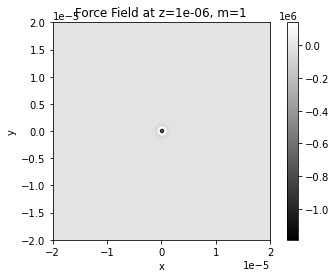

array([[0.00049119, 0.00049856, 0.00050605, ..., 0.00050605, 0.00049856,
        0.00049119],
       [0.00049856, 0.00050609, 0.00051372, ..., 0.00051372, 0.00050609,
        0.00049856],
       [0.00050605, 0.00051372, 0.00052151, ..., 0.00052151, 0.00051372,
        0.00050605],
       ...,
       [0.00050605, 0.00051372, 0.00052151, ..., 0.00052151, 0.00051372,
        0.00050605],
       [0.00049856, 0.00050609, 0.00051372, ..., 0.00051372, 0.00050609,
        0.00049856],
       [0.00049119, 0.00049856, 0.00050605, ..., 0.00050605, 0.00049856,
        0.00049119]])

In [201]:
cmap(1,1*10**-6)

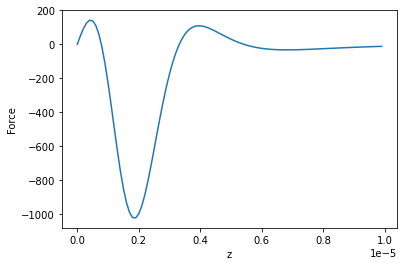

In [199]:
force_z(1, [2*10**-6,2*10**-6])

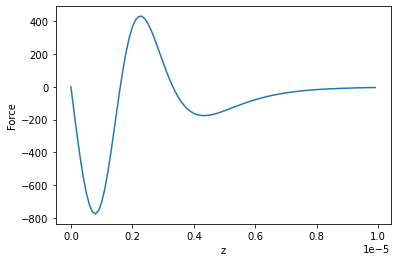

In [197]:
force_z(2, [2*10**-6,2*10**-6])

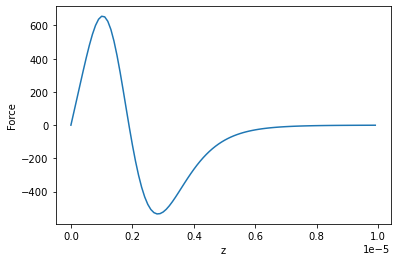

In [198]:
force_z(3, [2*10**-6,2*10**-6])

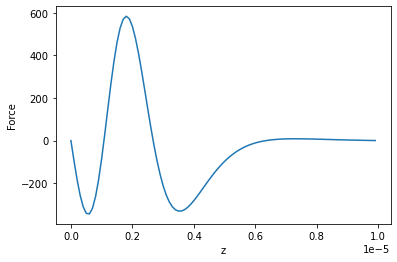

In [200]:
force_z(0, [2*10**-6,2*10**-6])